In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sales = pd.read_csv('sales-cars.csv')

In [7]:
sales.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [9]:
sales.Month[1]

'2016-02'

In [10]:
sales['Month'] = pd.to_datetime(df['Month'])

In [11]:
sales.head()

,Month,Sales
0,2016-01-01,266
1,2016-02-01,146
2,2016-03-01,183
3,2016-04-01,119
4,2016-05-01,180


In [12]:
sales.set_index('Month',inplace=True)

In [13]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


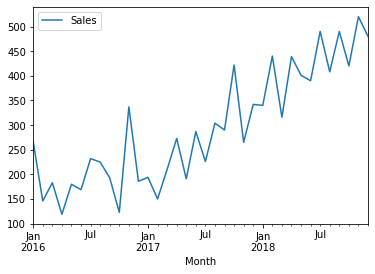

In [14]:
sales.plot()

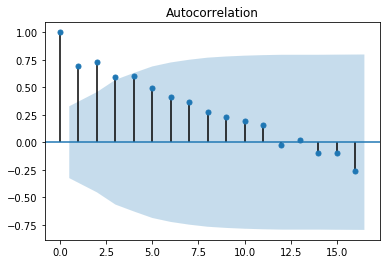

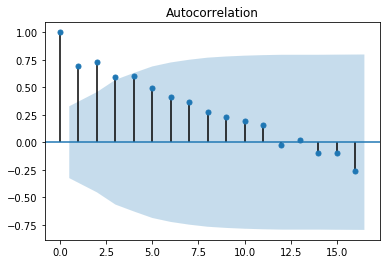

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

#Stationary means mean, variance and covariance is constant over time period

## Converting series to Stationary

In [15]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [25]:
sales_diff = sales.diff(periods=1)
# integrated of order 1, denoted by d(difference), one of the parameter of ARIMA model

In [18]:
sales_diff.head()

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0


In [19]:
sales_diff = sales_diff[1:]

In [20]:
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


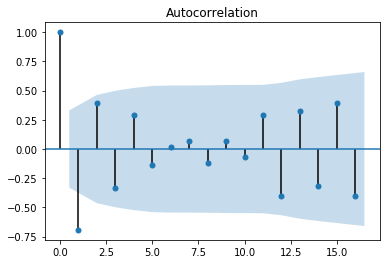

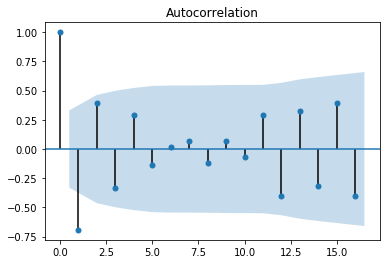

In [23]:
plot_acf(sales_diff)

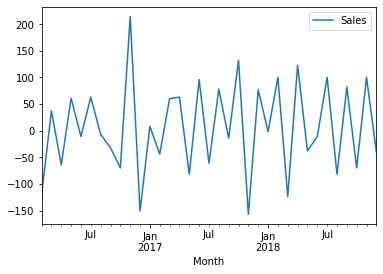

In [24]:
sales_diff.plot()

In [27]:
X = sales.values
train = X[:27] # 27 data as train data
test = X[27:] # 9 data as test data

In [40]:
# AUtoregressive Model

In [29]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [37]:
predictions = model_ar_fit.predict(start=26, end=36)

In [38]:
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

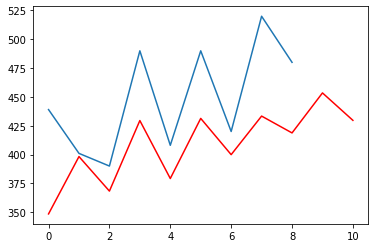

In [39]:
plt.plot(test)
plt.plot(predictions,color='r')

# ARIMA model

In [41]:
from statsmodels.tsa.arima_model import ARIMA

In [142]:
#p,d,q
#p = periods taken for autoregressive model
#d = integrated order or difference
#q = periods in moving average
model_arima = ARIMA(train, order=(5,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

299.3889889895767


In [143]:
predictions = model_arima_fit.forecast(steps=9)[0]

In [144]:
predictions

array([378.99240427, 356.911679  , 424.73165397, 374.32336924,
       404.87101807, 391.17361346, 430.43450326, 413.50473921,
       431.96453976])

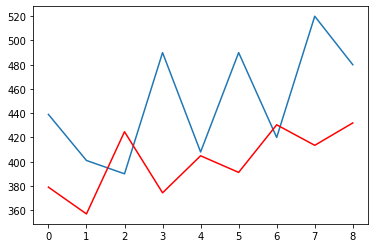

In [145]:
plt.plot(test)
plt.plot(predictions,'r')

In [146]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))

In [62]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [65]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=(param))
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809384947
(0, 0, 2) 315.25060028727887
(0, 0, 3) nan
(0, 0, 4) 310.1669328592633
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841530678005
(0, 1, 2) 296.32292269078266
(0, 1, 3) 298.31202117389336
(0, 1, 4) 300.3393975617985
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019469685257
(0, 2, 2) 290.3983417235849
(0, 2, 3) 292.9858847060129
(1, 0, 0) 316.1668717534279
(1, 0, 1) 313.0487174406702
(1, 0, 2) 310.9790642275034
(1, 1, 0) 298.8325442271006
(1, 1, 1) 297.12565112585196
(1, 1, 2) 299.47166670629457
(1, 1, 3) 301.28511809480204
(1, 2, 0) 306.53077675708374
(2, 0, 0) 310.9969573612191
(2, 0, 1) 342.5246358294303
(2, 1, 0) 300.20895612399573
(2, 1, 1) 297.99999301674006
(2, 1, 2) 298.55054281302245
(2, 1, 3) 302.87208388612163
(2, 2, 0) 306.2975856431866
(3, 0, 0) 312.9838587473828
(3, 0, 1) 336.078521041164
(3, 1, 0) 294.85435842186024
(3, 1, 1) 295.9979353418612
(3, 1, 2) 292.66862386939545
(3, 1, 3) 294.6588907518689
(3, 2, 0) 299.4075868

In [89]:
sales.tail()

,Sales
Month,
2018-08-01,408
2018-09-01,490
2018-10-01,420
2018-11-01,520
2018-12-01,480


In [90]:
import statsmodels.api as sm

In [154]:
model = sm.tsa.statespace.SARIMAX(sales['Sales'],order=(5,1,1), seasonal_order=(5,1,1,12))
result = model.fit()

In [155]:
sales['forecast'] = result.predict(start=27,end=35,dynamic=True)

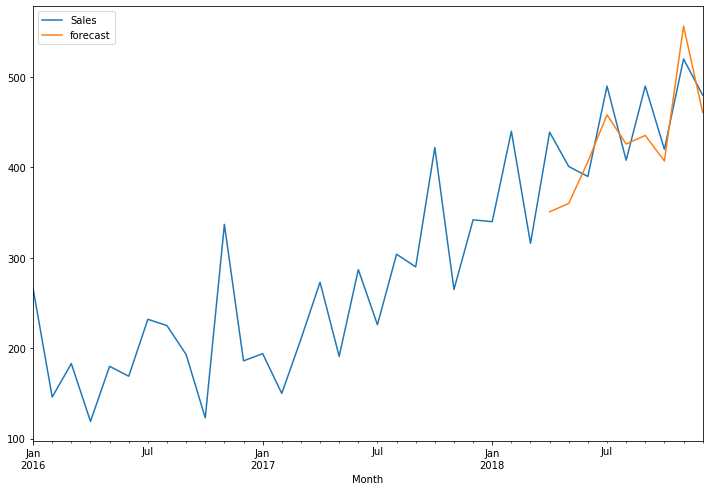

In [156]:
sales[['Sales','forecast']].plot(figsize=(12,8))

In [157]:
from pandas.tseries.offsets import DateOffset

In [159]:
sales.tail()

,Sales,forecast
Month,,
2018-08-01,408,425.923614
2018-09-01,490,435.375709
2018-10-01,420,407.119626
2018-11-01,520,556.368375
2018-12-01,480,460.914127


In [160]:
future_dates = [sales.index[-1] + DateOffset(months=x) for x in range(0,24)]

In [161]:
future_date_df = pd.DataFrame(index=future_dates[1:],columns=sales.columns)

In [163]:
future_df = pd.concat([sales,future_date_df])

In [170]:
future_df['forecast'] = result.predict(start=35,end=60,dynamic=True)

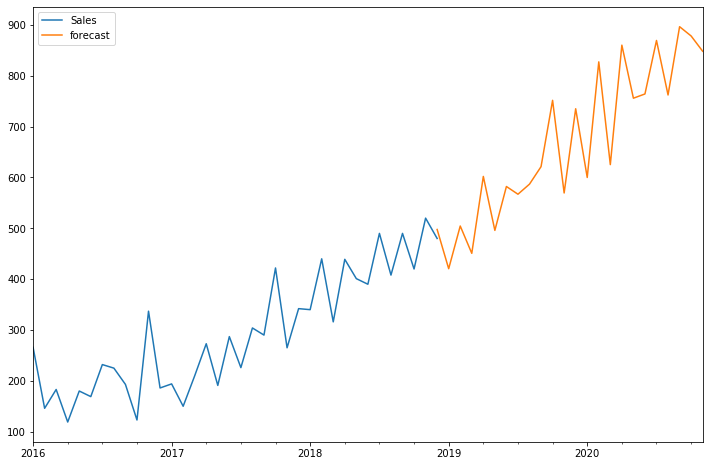

In [171]:
future_df[['Sales','forecast']].plot(figsize=(12,8))